In [114]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import glob

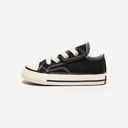

In [115]:
image = Image.open("./Data/Shoew_Added/converse3.jpg")
image = image.resize((128,128))
image

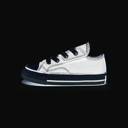

In [116]:
img_reversed = 255-(np.array(image))
img_reversed = Image.fromarray(img_reversed)
img_reversed

In [117]:
fileCount = 0
image_w = 128
image_h = 128

for angle in range(-180, 180, 1):
    # 회전 데이터 추가
    img_rotated = img_reversed.rotate(angle)
    img_rotated.save("./Data/Shoew_Added/pca_test/converse_3_%03d.jpg"%(fileCount),"JPEG")
    fileCount += 1
    # 반전 데이터 추가
    img_fliped = img_reversed.transpose(Image.FLIP_LEFT_RIGHT)
    img_fliped.save("./Data/Shoew_Added/pca_test/converse_3_%03d.jpg"%(fileCount),"JPEG")
    fileCount += 1

In [118]:
width = 128
height = 128
count = 720
channel = 3

In [119]:
train = np.zeros(count*height*width*channel,dtype=np.float32).reshape(count,height,width,channel)
i = 0
for file in sorted(glob.glob("./Data/Shoew_Added/pca_test/*.jpg")):
    img = np.array(Image.open(file),dtype=np.float32)
    train[i,:,:,:] = img
    i+=1

In [137]:
train = train.reshape(-1,height*width*channel)
df = pd.DataFrame(train)
print(len(df))
df.head()


720


,0,1,2,3,4,5,6,7,8,9,...,49142,49143,49144,49145,49146,49147,49148,49149,49150,49151
0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,...,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0
1,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,...,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,...,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [121]:
converse3_2D = np.array(df)

In [122]:
converse3_2D.shape

(720, 49152)

In [123]:
converse3_2D.reshape(-1,128,128,3).shape

(720, 128, 128, 3)

In [124]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50) # 720개의 데이터 중 구별이 확실한 주성분 100개 선택
pca.fit(converse3_2D)

PCA(n_components=50)

In [125]:
pca.components_.shape

(50, 49152)

In [126]:
def draw_shoes(arr,ratio=1): # ratio: 해상도 크기
    n = len(arr) # n: sample 개수
    # 한 줄에 10개씩 이미지 그리기
    # sample 개수를 10으로 나누어 전체 행 개수를 계산
    rows = int(np.ceil(n/10))
    # 행이 1개이면 열 개수는 sample 개수이고 그렇지 않으면 10개이다.
    cols = n if rows < 2 else 10

    fig, axs = plt.subplots(rows,cols,figsize=(cols*ratio,rows*ratio),squeeze=False)

    for i in range(rows):
        for j in range(cols):
            if i * 10 + j < n:
                axs[i,j].imshow(arr[i*10+j])
            axs[i,j].axis('off')
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

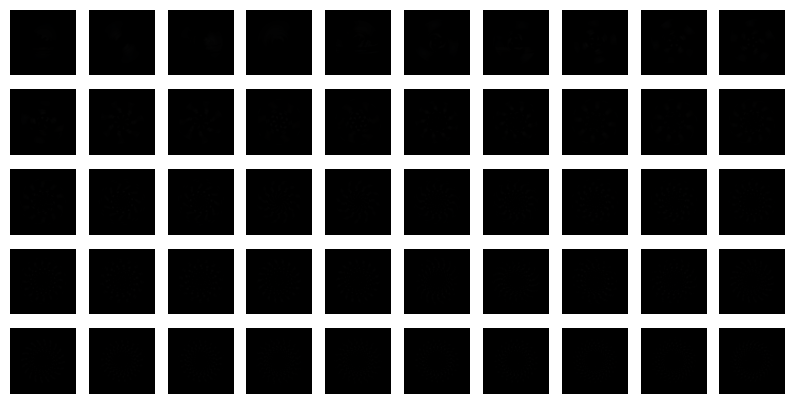

In [127]:
draw_shoes(pca.components_.reshape(-1,128,128,3))

In [128]:
# 행의 개수는 원본과 동일하게 하고 Feature의 특성을 50개의 주성분으로 변경하기
print(converse3_2D.shape)
shoes_pca = pca.transform(converse3_2D)
print(shoes_pca.shape) # 49152개의 Feature가 50개로 축소됨

(720, 49152)
(720, 50)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

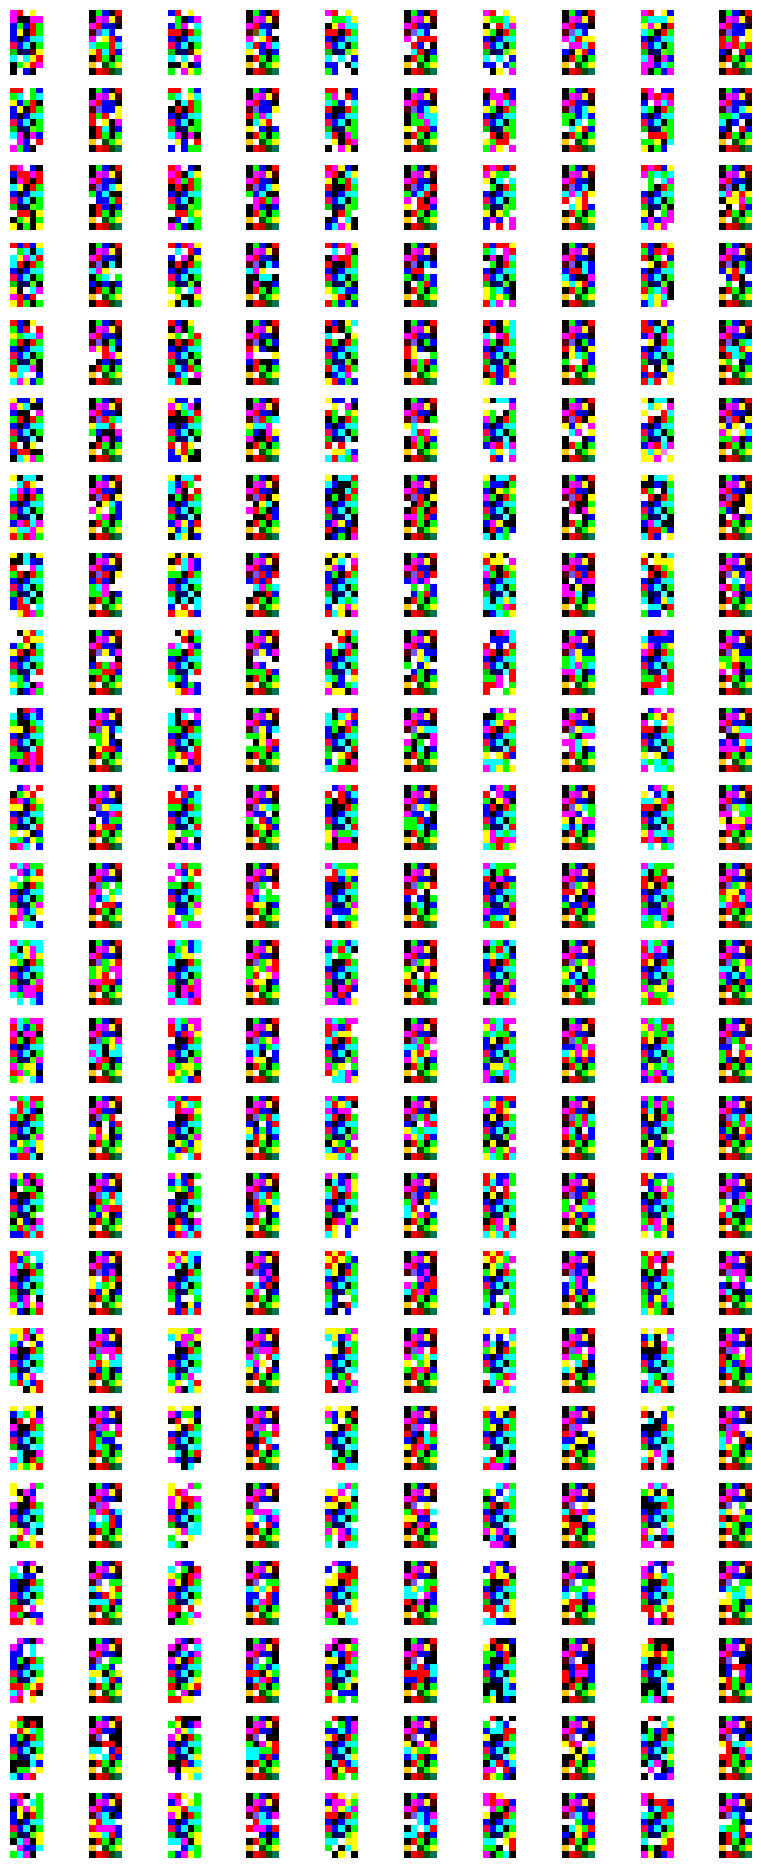

In [129]:
draw_shoes(shoes_pca.reshape(-1,10,5,3))

In [130]:
shoes_inverse = pca.inverse_transform(shoes_pca)
shoes_inverse.shape

(720, 49152)

In [131]:
# 그림을 그리기 위해 2차원 확장
shoes_reconstruct = shoes_inverse.reshape(-1,128,128,3)
shoes_reconstruct.shape

(720, 128, 128, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

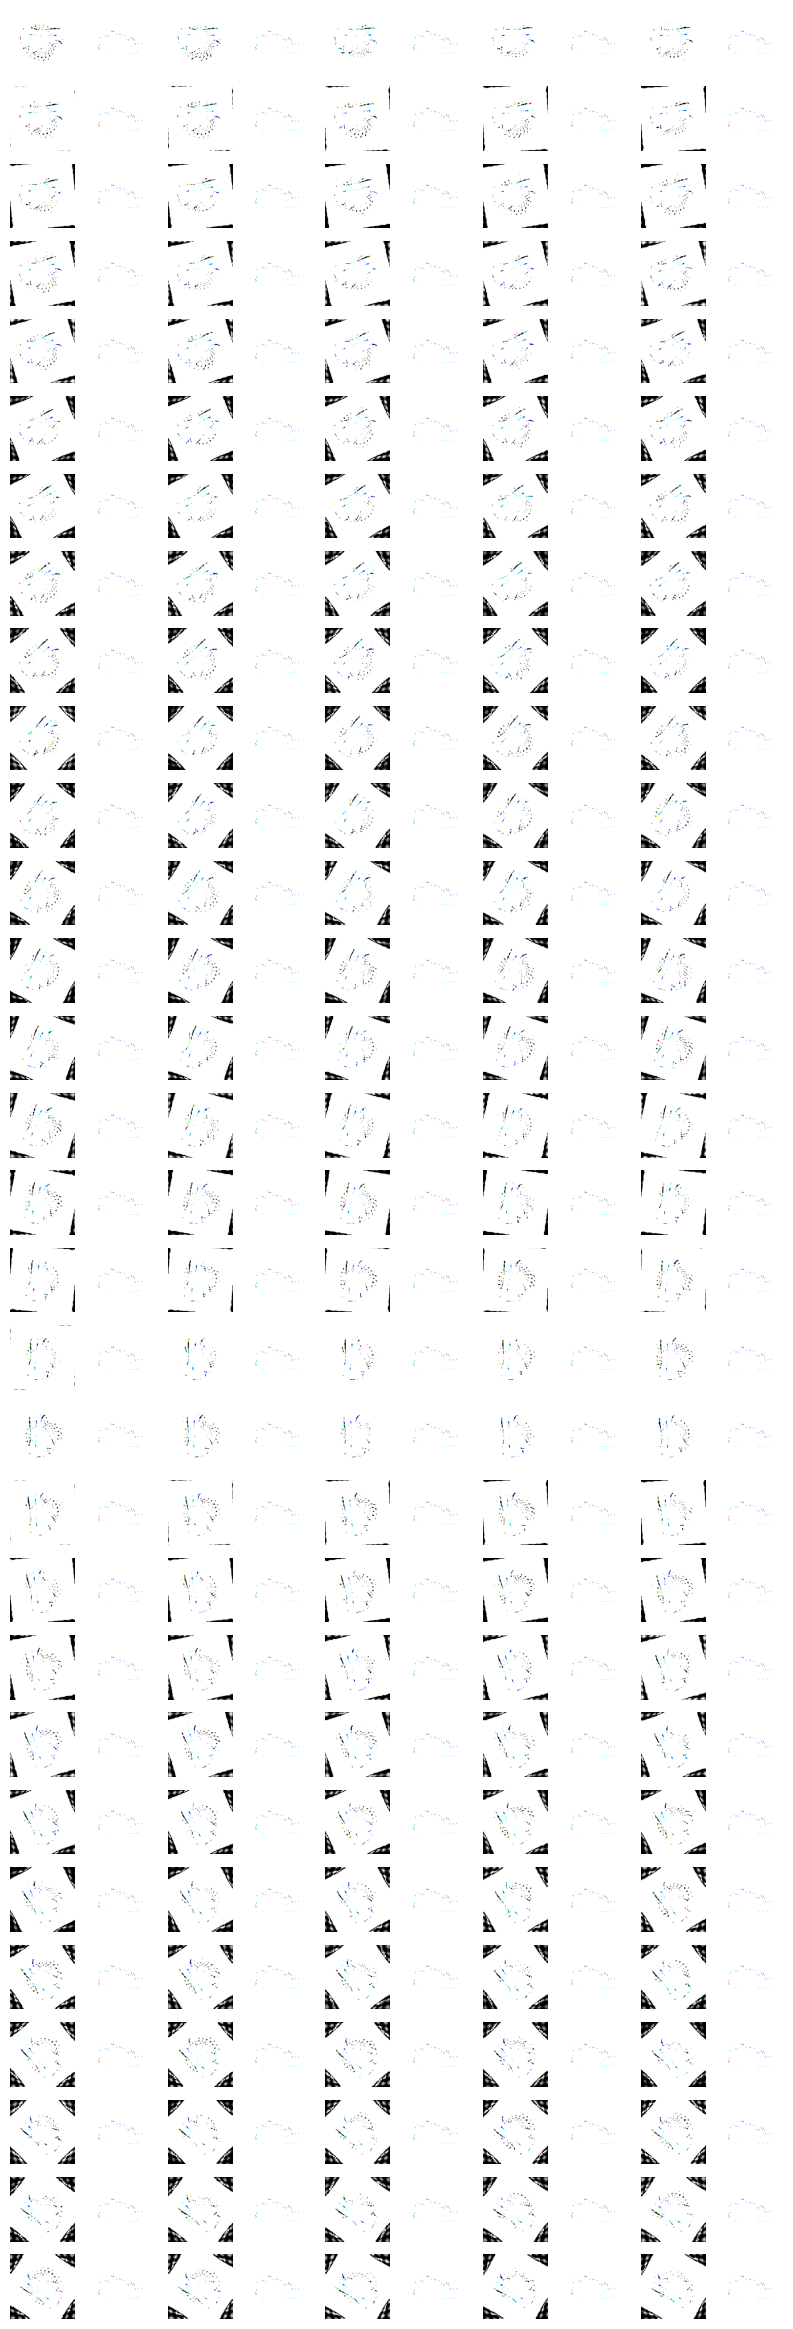

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

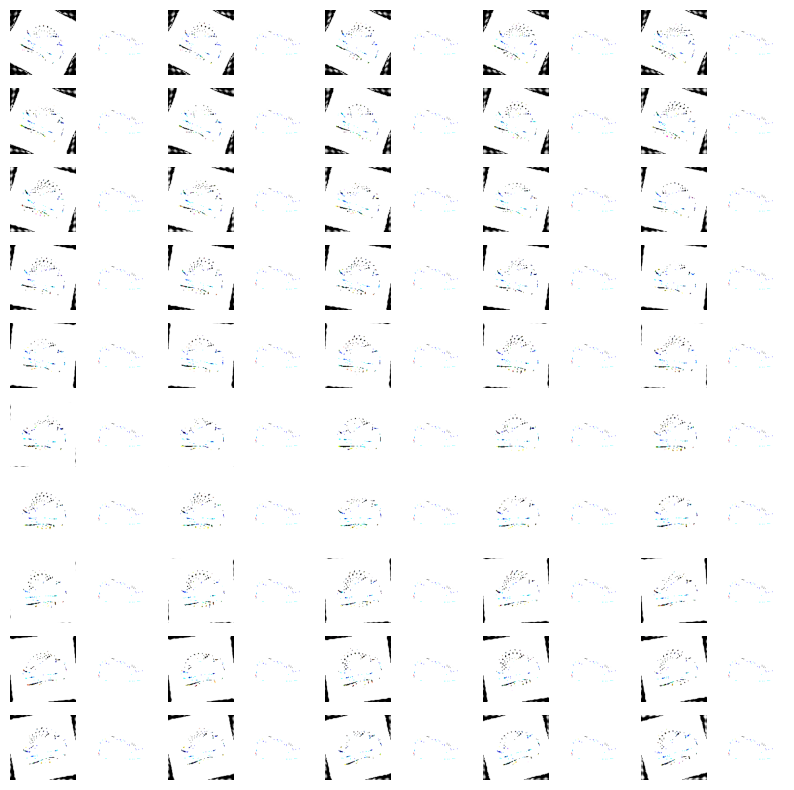

ValueError: Number of rows must be a positive integer, not 0

<Figure size 0x0 with 0 Axes>

In [136]:
for start in [0,100,200]:
    draw_shoes(shoes_reconstruct[start*3:start+100*3])

In [133]:
# 복원 능력
np.sum(pca.explained_variance_ratio_)

0.9443355

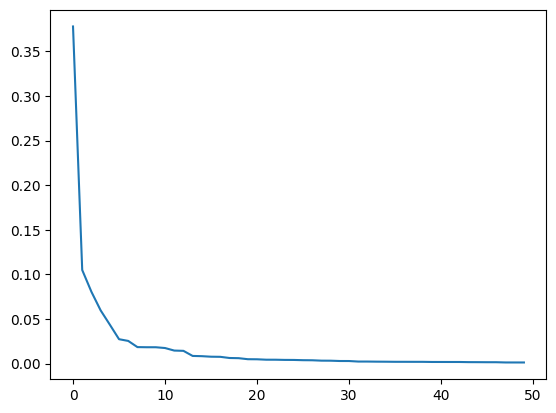

In [134]:
plt.plot(pca.explained_variance_ratio_)
plt.show()